In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [136]:
# Pulling data downloaded from Redfin
csv_path = "HousingDataClean.csv"
housing_df = pd.read_csv(csv_path)
housing_df.head()

,City,Homes Sold,Inventory,Median Dom,Median List Price,Median Sale Price,New Listings,Period Begin,Period Duration,Period End,Price Drops,Property Type,Region
0,National,159514,744443,66,266500.0,243000,232357,1/1/16,30,1/31/16,0.191761,All Residential,National
1,National,165717,765626,68,276700.0,243000,270865,2/1/16,30,2/29/16,0.180770,All Residential,National
2,National,222043,795934,60,286200.0,254000,340460,3/1/16,30,3/31/16,0.218335,All Residential,National
3,National,234992,826487,50,289100.0,264000,350319,4/1/16,30,4/30/16,0.224657,All Residential,National
4,National,263957,841678,44,287400.0,269000,342288,5/1/16,30,5/31/16,0.233373,All Residential,National


In [137]:
#Getting the difference between list price and sold price

housing_df['ListvSold'] = housing_df['Median Sale Price'] - housing_df['Median List Price'] 
housing_df['NewvSold'] = housing_df['New Listings'] - housing_df['Homes Sold'] 
housing_df = housing_df.rename(columns={'Period Begin': 'Date'})
housing_df['Date'] = pd.to_datetime(housing_df['Date'], format='%d/%m/%y')

housing_df.head()

,City,Homes Sold,Inventory,Median Dom,Median List Price,Median Sale Price,New Listings,Date,Period Duration,Period End,Price Drops,Property Type,Region,ListvSold,NewvSold
0,National,159514,744443,66,266500.0,243000,232357,2016-01-01,30,1/31/16,0.191761,All Residential,National,-23500.0,72843
1,National,165717,765626,68,276700.0,243000,270865,2016-01-02,30,2/29/16,0.180770,All Residential,National,-33700.0,105148
2,National,222043,795934,60,286200.0,254000,340460,2016-01-03,30,3/31/16,0.218335,All Residential,National,-32200.0,118417
3,National,234992,826487,50,289100.0,264000,350319,2016-01-04,30,4/30/16,0.224657,All Residential,National,-25100.0,115327
4,National,263957,841678,44,287400.0,269000,342288,2016-01-05,30,5/31/16,0.233373,All Residential,National,-18400.0,78331


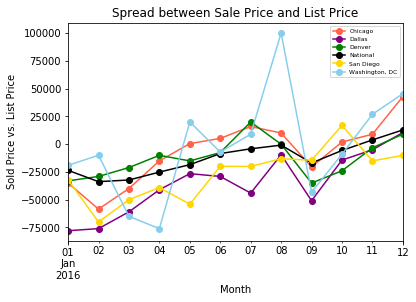

In [138]:
HousingMonth = pd.pivot_table(housing_df, values='ListvSold', columns='City', index='Date')

HousingMonth.plot(kind='line', color=['Tomato', 'Purple', 'Green', 'Black', 'Gold', 'SkyBlue'] ,marker='o')

plt.title("Spread between Sale Price and List Price")
plt.xlabel("Month")
plt.ylabel("Sold Price vs. List Price")
plt.legend(loc="best", prop={'size': 6})

plt.show()


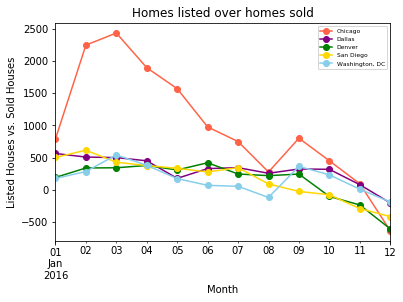

In [139]:
SalesMonth = pd.pivot_table(housing_df, values='NewvSold', columns='City', index='Date')
SalesMonth.drop('National', axis=1, inplace=True)
SalesMonth.head()

SalesMonth.plot(kind='line', color=['Tomato', 'Purple', 'Green', 'Gold', 'SkyBlue'], marker="o")

plt.title("Homes listed over homes sold")
plt.xlabel("Month")
plt.ylabel("Listed Houses vs. Sold Houses")
plt.legend(loc="best", prop={'size': 6})

plt.show()

In [140]:
#housing_df.plot(kind='scatter', x='Date', y='New Listings')

#plt.show()